In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import geopandas as gpd

# Data Collection:

In [2]:
df= pd.read_csv("df_3.csv")

In [3]:
gb_shape2 = gpd.read_file('/Users/mercedesfleitas/Desktop/world map/world-administrative-boundaries/world-administrative-boundaries.shp')

In [6]:
shape_path= '/Users/mercedesfleitas/Desktop/world map/world-administrative-boundaries/world-administrative-boundaries.shp'

In [7]:
shape = gpd.read_file(shape_path)

# Understanding DATASET

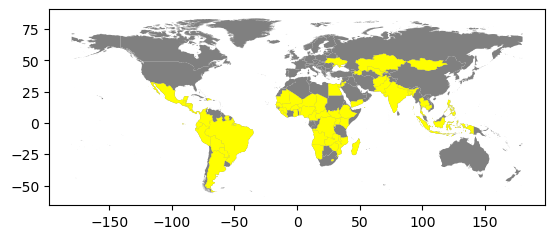

In [70]:
# Extract unique country values from filtered_sweat_2
countries_to_include = df['Country'].unique()

# Filter gb_shape to include only geometries where 'name' matches countries in countries_to_include
filtered_gb_shape = gb_shape2[gb_shape2['name'].isin(countries_to_include)]

# Plotting all geometries in gray
ax = gb_shape2.plot(color='gray')

# Plotting filtered geometries in yellow
filtered_gb_shape.plot(ax=ax, color='yellow')

# Show the plot
plt.show()

In [71]:
df.head()

,Country,Index_score,Due_Diligence_Reponse,Legal_framework_score,Enforcement_score,Outcome_score,Country Numeric Iso Code,Country Iso Code,Sector,Good,...,Enforcement Criminal Criminal New Law Training,Enforcement Criminal Criminal Refresher Courses,Enforcement Criminal Criminal Investigations,Enforcement Criminal Criminal Violations,Enforcement Criminal Criminal Prosecutions,Enforcement Criminal Criminal Convictions,Enforcement Criminal Criminal Referral Mechanism,Coordination,Policy,Program
0,Afghanistan,6.2,Enhanced,2.8,7.21,7.37,4,AF,Manufacturing,Bricks,...,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,No,Yes,Yes,Yes
1,Afghanistan,6.2,Enhanced,2.8,7.21,7.37,4,AF,Manufacturing,Carpets,...,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,No,Yes,Yes,Yes
2,Afghanistan,6.2,Enhanced,2.8,7.21,7.37,4,AF,Agriculture,Poppies,...,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,No,Yes,Yes,Yes
3,Afghanistan,6.2,Enhanced,2.8,7.21,7.37,4,AF,Mining,Coal,...,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,No,Yes,Yes,Yes
4,Afghanistan,6.2,Enhanced,2.8,7.21,7.37,4,AF,Mining,Salt,...,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,No,Yes,Yes,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 88 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Country                                                    483 non-null    object 
 1   Index_score                                                483 non-null    float64
 2   Due_Diligence_Reponse                                      483 non-null    object 
 3   Legal_framework_score                                      483 non-null    float64
 4   Enforcement_score                                          483 non-null    float64
 5   Outcome_score                                              483 non-null    float64
 6   Country Numeric Iso Code                                   483 non-null    int64  
 7   Country Iso Code                                           481 non-null    object 
 8   Sector    

# CHANGING DATATYPES 

In [11]:
# Replace non-numeric values with NaN and convert to float
df['Compulsory Education Age'] = pd.to_numeric(df['Compulsory Education Age'], errors='coerce')

# Verify the data type of the column after conversion
print(df['Compulsory Education Age'].dtype)

float64


In [12]:
# Replace non-numeric values with NaN and convert to float
df['Percent Of Working Children'] = pd.to_numeric(df['Percent Of Working Children'], errors='coerce')

# Verify the data type of the column after conversion
print(df['Percent Of Working Children'].dtype)


float64


# CREATING VARIABLES OF INTEREST

In [15]:
# Replace original values with merged categories
df['Assessment_Level'] = df['Assessment_Level'].replace({
    'Minimal Advancement - Efforts Made but Continued Practice that Delayed Advancement': 'Advancement',
    'Minimal Advancement - Efforts Made but Regression in Practice that Delayed Advancement': 'Advancement',
    'Minimal Advancement - Efforts Made but Regression in Practices that Delayed Advancement': 'Advancement',
    'Minimal Advancement - Efforts Made but Continued Law that Delayed Advancement': 'Advancement',
    'No Advancement - Efforts Made but Complicit in Forced Child Labor': 'No Advancement',
    'Moderate Advancement ': 'Moderate Advancement'

})

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Create frequency distribution of values in the 'Assessment_Level' column
assessment_level_freq = df['Assessment_Level'].value_counts()

# Print frequency distribution
print(assessment_level_freq)



Moderate Advancement       341
Advancement                 84
Significant Advancement     29
Minimal Advancement         19
No Advancement              10
Name: Assessment_Level, dtype: int64


## Summary Statistics

In [16]:
df.describe()

,Index_score,Legal_framework_score,Enforcement_score,Outcome_score,Country Numeric Iso Code,Year Added,Year Removed,Region Id,Year,Assessment Level Id,Percent Of Working Children,Percent Of Working Children Agriculture,Percent Of Working Children Industry,Percent Of Working Children Services,Minimum Work Age,Minimum Hazardous Work Age,Minimum Compulsory Military Age,Minumum Voluntary Military Age,Minumum Non State Military Age,Compulsory Education Age
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,392.00000,483.000000,483.0,483.000000,479.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.0,483.000000,0.0,477.000000
mean,5.098551,3.223540,6.216646,5.453602,396.091097,2011.451346,2016.34949,3.320911,2022.0,8.204969,12.230063,66.004762,9.394410,24.397516,15.412008,17.732919,18.0,17.432712,NaN,15.513627
std,0.952186,0.937358,1.032541,1.361909,248.694558,4.079502,2.47913,1.708691,0.0,14.432322,11.165301,18.935121,8.459973,14.960997,1.503116,0.968965,0.0,0.951700,NaN,1.769941
min,3.100000,1.370000,3.840000,2.290000,4.000000,2009.000000,2011.00000,1.000000,2022.0,1.000000,1.000000,10.400000,0.200000,1.600000,12.000000,14.000000,18.0,15.000000,NaN,11.000000
25%,4.500000,2.590000,5.340000,4.670000,180.000000,2009.000000,2013.00000,1.000000,2022.0,2.000000,4.000000,53.300000,3.200000,9.600000,14.000000,18.000000,18.0,16.000000,NaN,14.000000
50%,4.900000,3.100000,6.230000,5.270000,360.000000,2009.000000,2018.00000,4.000000,2022.0,2.000000,9.200000,62.400000,8.700000,21.200000,15.000000,18.000000,18.0,18.000000,NaN,15.000000
75%,5.900000,3.860000,6.740000,6.600000,586.000000,2012.000000,2018.00000,5.000000,2022.0,2.000000,17.400000,79.200000,14.800000,35.200000,16.000000,18.000000,18.0,18.000000,NaN,17.000000
max,7.300000,5.740000,8.960000,8.800000,894.000000,2022.000000,2022.00000,5.000000,2022.0,51.000000,47.700000,97.300000,82.400000,64.900000,19.000000,19.000000,18.0,20.000000,NaN,18.000000


## Check for missing values

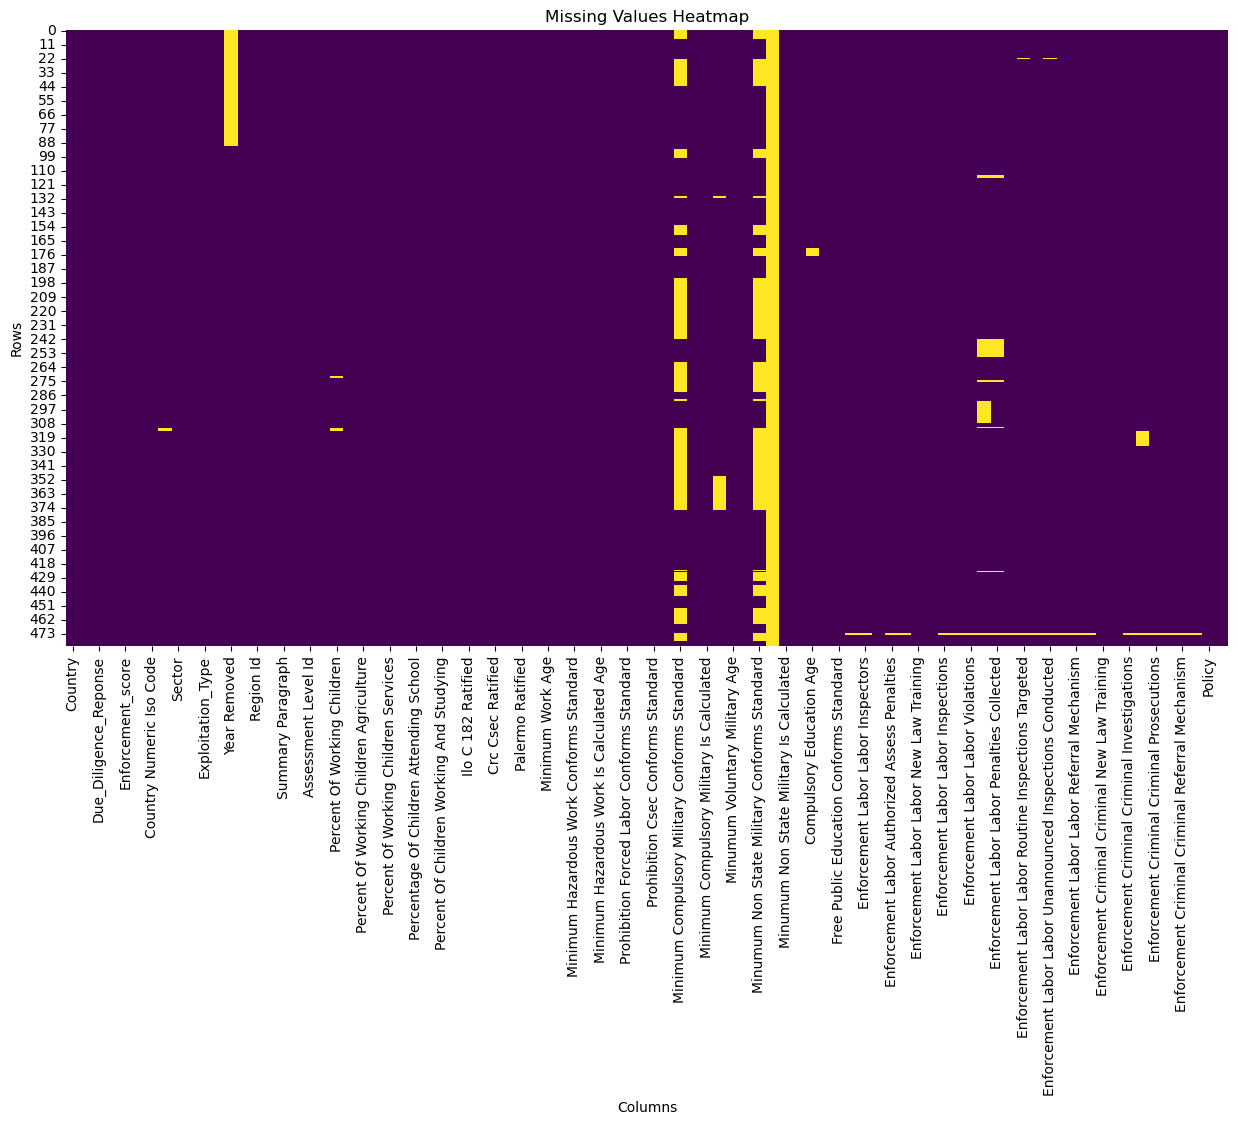

In [17]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [79]:
missing_values = df.isna().sum()


missing_values_sorted = missing_values.sort_values(ascending=False)

print("Top 10 columns with the most missing values:")
print(missing_values_sorted.head(10))

Top 10 columns with the most missing values:
Minumum Non State Military Age                   483
Minumum Non State Military Conforms Standard     225
Minimum Compulsory Military Conforms Standard    225
Year Removed                                      91
Enforcement Labor Labor Penalties Imposed         38
Minumum Voluntary Military Conforms Standard      28
Enforcement Labor Labor Penalties Collected       21
Enforcement Criminal Criminal Violations          13
Compulsory Education Age                           6
Percent Of Working Children                        4
dtype: int64


# Dataset part 1 

Missing Values 

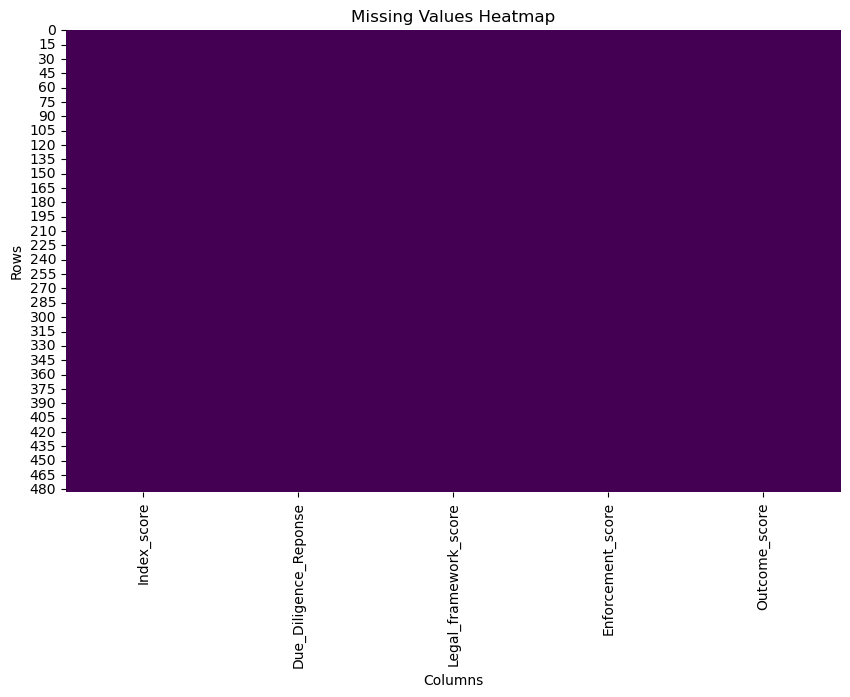

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the specified columns
columns_to_check = ['Index_score', 'Due_Diligence_Reponse', 'Legal_framework_score', 'Enforcement_score', 'Outcome_score']

# Create a DataFrame containing only the specified columns
selected_columns_df1 = df[columns_to_check]

# Generate a heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(selected_columns_df1.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


Summary Statistics

In [19]:
selected_columns_df1.describe()

,Index_score,Legal_framework_score,Enforcement_score,Outcome_score
count,483.000000,483.000000,483.000000,483.000000
mean,5.098551,3.223540,6.216646,5.453602
std,0.952186,0.937358,1.032541,1.361909
min,3.100000,1.370000,3.840000,2.290000
25%,4.500000,2.590000,5.340000,4.670000
50%,4.900000,3.100000,6.230000,5.270000
75%,5.900000,3.860000,6.740000,6.600000
max,7.300000,5.740000,8.960000,8.800000


Correlation Analysis

In [63]:
selected_columns_df1.corr(numeric_only=True)

,Index_score,Legal_framework_score,Enforcement_score,Outcome_score
Index_score,1.000000,0.638450,0.687037,0.924966
Legal_framework_score,0.638450,1.000000,0.425788,0.397267
Enforcement_score,0.687037,0.425788,1.000000,0.435220
Outcome_score,0.924966,0.397267,0.435220,1.000000


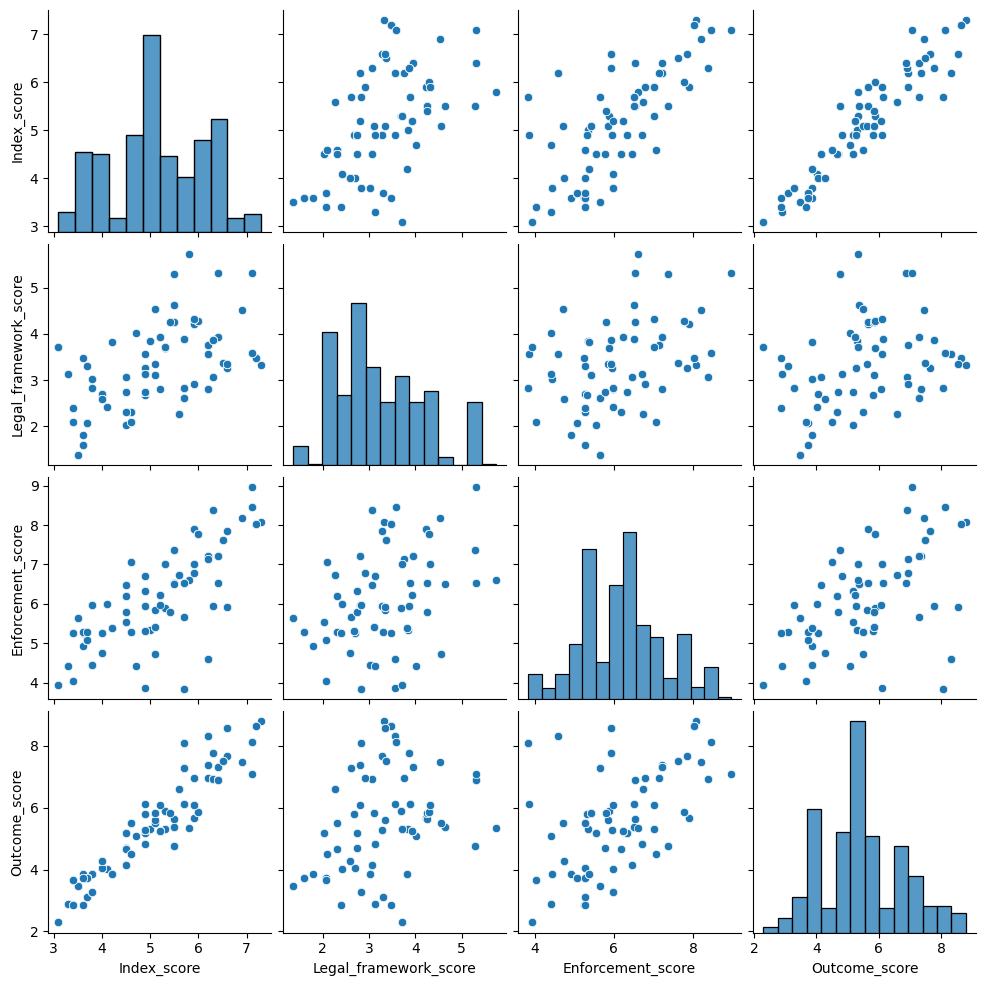

In [64]:
sns.pairplot(selected_columns_df1)

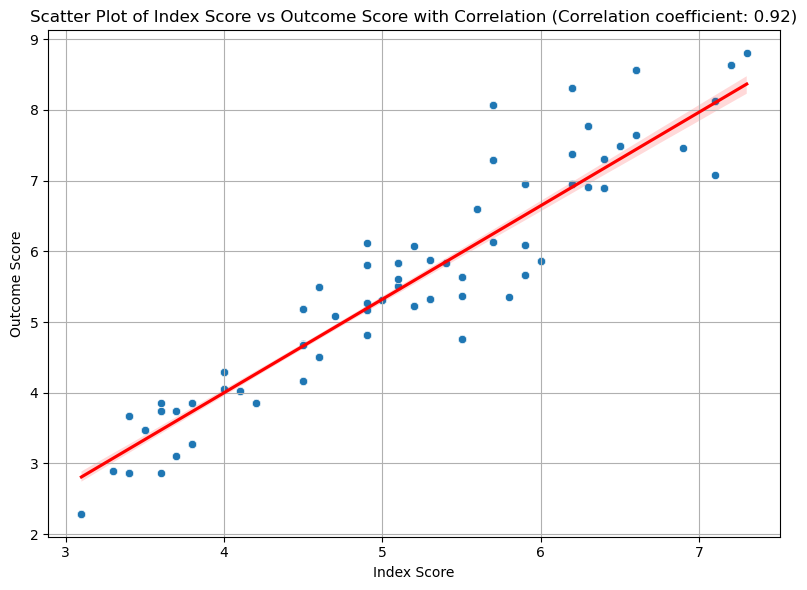

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=selected_columns_df1, x='Index_score', y='Outcome_score')

sns.regplot(data=selected_columns_df1, x='Index_score', y='Outcome_score', scatter=False, color='red')

correlation_coefficient = selected_columns_df1['Index_score'].corr(selected_columns_df1['Outcome_score'])

plt.title(f'Scatter Plot of Index Score vs Outcome Score with Correlation (Correlation coefficient: {correlation_coefficient:.2f})')
plt.xlabel('Index Score')
plt.ylabel('Outcome Score')

plt.grid(True)
plt.tight_layout()
plt.show()

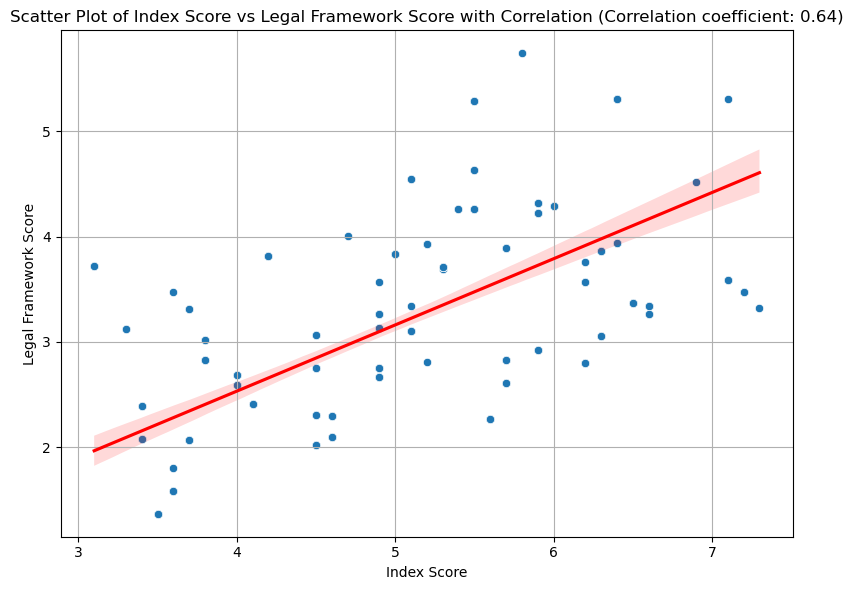

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=selected_columns_df1, x='Index_score', y='Legal_framework_score')

sns.regplot(data=selected_columns_df1, x='Index_score', y='Legal_framework_score', scatter=False, color='red')

correlation_coefficient = selected_columns_df1['Index_score'].corr(selected_columns_df1['Legal_framework_score'])

plt.title(f'Scatter Plot of Index Score vs Legal Framework Score with Correlation (Correlation coefficient: {correlation_coefficient:.2f})')
plt.xlabel('Index Score')
plt.ylabel('Legal Framework Score')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

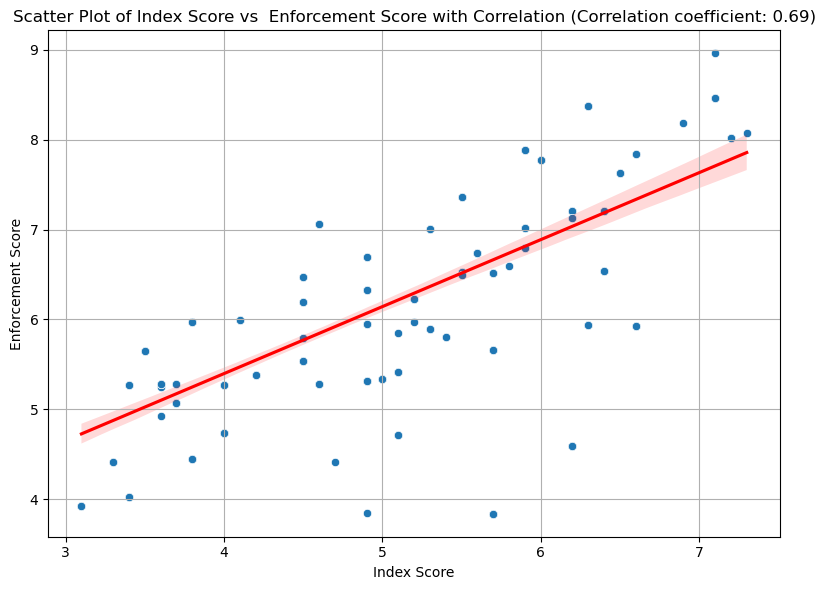

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=selected_columns_df1, x='Index_score', y='Enforcement_score')

sns.regplot(data=selected_columns_df1, x='Index_score', y='Enforcement_score', scatter=False, color='red')

correlation_coefficient = selected_columns_df1['Index_score'].corr(selected_columns_df1['Enforcement_score'])

plt.title(f'Scatter Plot of Index Score vs  Enforcement Score with Correlation (Correlation coefficient: {correlation_coefficient:.2f})')
plt.xlabel('Index Score')
plt.ylabel('Enforcement Score')

plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
index_score_per_country = df.groupby('Country')['Index_score'].mean().sort_index(ascending=False)

index_score_sorted_index = index_score_per_country.sort_values()

top_5_lowest_scores = index_score_sorted_index.head(5)

print("Top 5 Countries with the Lowest Index Scores:")
print(top_5_lowest_scores)

Top 5 Countries with the Lowest Index Scores:
Country
Panama        3.1
Costa Rica    3.3
Ukraine       3.4
Mongolia      3.4
Ecuador       3.5
Name: Index_score, dtype: float64


In [53]:
index_score_per_country = df.groupby('Country')['Outcome_score'].mean().sort_index(ascending=False)

index_score_sorted_outcome = index_score_per_country.sort_values()

top_5_lowest_scores = index_score_sorted_outcome.head(5)

print("Top 5 Countries with the Lowest Outcome_score:")
print(top_5_lowest_scores)

Top 5 Countries with the Lowest Outcome_score:
Country
Panama        2.29
Ukraine       2.86
Jordan        2.86
Costa Rica    2.90
Lebanon       3.10
Name: Outcome_score, dtype: float64


In [55]:
# Extract the Index_score per country
index_score_per_country = df.groupby('Country')['Legal_framework_score'].mean().sort_index(ascending=False)

# Sort the index_score_per_country Series in ascending order
index_score_sorted = index_score_per_country.sort_values()

# Select the top 5 countries with the lowest index scores
top_5_lowest_scores = index_score_sorted.head(5)

# Display the top 5 countries with the lowest index scores as a list
print("Top 5 Countries with the Lowest Legal_framework_score:")
print(top_5_lowest_scores)

Top 5 Countries with the Lowest Legal_framework_score:
Country
Ecuador       1.37
Kazakhstan    1.59
Azerbaijan    1.80
Ghana         2.02
Brazil        2.07
Name: Legal_framework_score, dtype: float64


In [56]:
# Extract the Index_score per country
index_score_per_country = df.groupby('Country')['Enforcement_score'].mean().sort_index(ascending=False)

# Sort the index_score_per_country Series in ascending order
index_score_sorted = index_score_per_country.sort_values()

# Select the top 5 countries with the lowest index scores
top_5_lowest_scores = index_score_sorted.head(10)

# Display the top 5 countries with the lowest index scores as a list
print("Top 5 Countries with the Lowest Enforcement_score:")
print(top_5_lowest_scores)

Top 5 Countries with the Lowest Enforcement_score:
Country
Burkina Faso    3.84
Lesotho         3.85
Panama          3.93
Mongolia        4.03
Rwanda          4.42
Costa Rica      4.42
Belize          4.45
Mali            4.59
Mauritania      4.72
El Salvador     4.74
Name: Enforcement_score, dtype: float64


# DataSet Part 2

Missing Values 

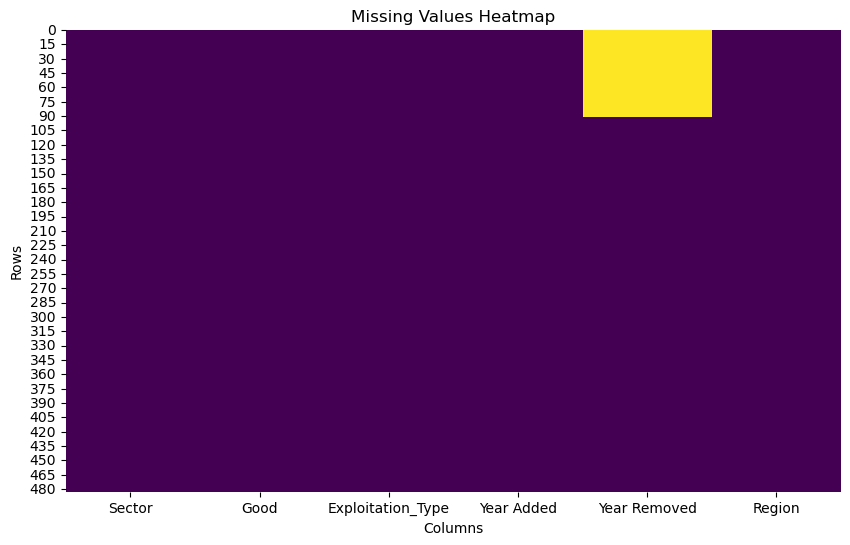

In [25]:
columns_to_check = ['Sector', 'Good','Exploitation_Type','Year Added','Year Removed','Region']

selected_columns_df2 = df[columns_to_check]

plt.figure(figsize=(10, 6))
sns.heatmap(selected_columns_df2.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


Summary Statistics

In [26]:
selected_columns_df2.describe(include='all')

,Sector,Good,Exploitation_Type,Year Added,Year Removed,Region
count,483,483,483,483.000000,392.00000,483
unique,4,140,4,NaN,NaN,5
top,Agriculture,Gold,CL,NaN,NaN,Latin America & the Caribbean
freq,268,28,367,NaN,NaN,167
mean,NaN,NaN,NaN,2011.451346,2016.34949,NaN
std,NaN,NaN,NaN,4.079502,2.47913,NaN
min,NaN,NaN,NaN,2009.000000,2011.00000,NaN
25%,NaN,NaN,NaN,2009.000000,2013.00000,NaN
50%,NaN,NaN,NaN,2009.000000,2018.00000,NaN
75%,NaN,NaN,NaN,2012.000000,2018.00000,NaN


In [65]:
unique_goods_count = df['Good'].nunique()

print("Number of unique goods in the DataFrame:", unique_goods_count)

Number of unique goods in the DataFrame: 140


Timeline of quantity of Goods added

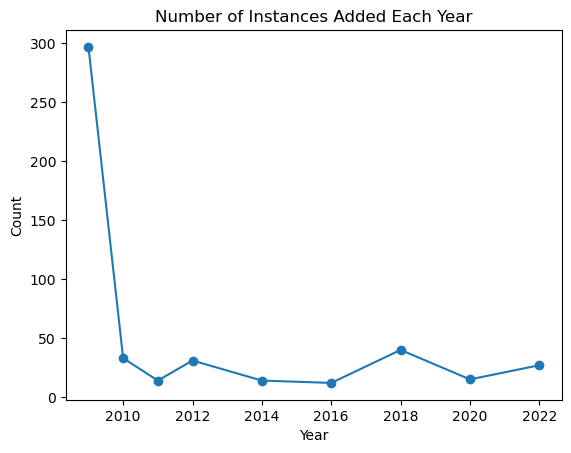

In [27]:
df['Year Added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Instances Added Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

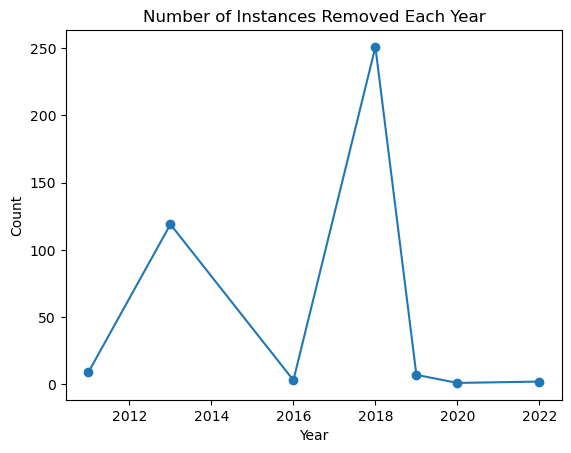

In [28]:
df['Year Removed'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Instances Removed Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Distribution of vaulues in columsn Explotation type

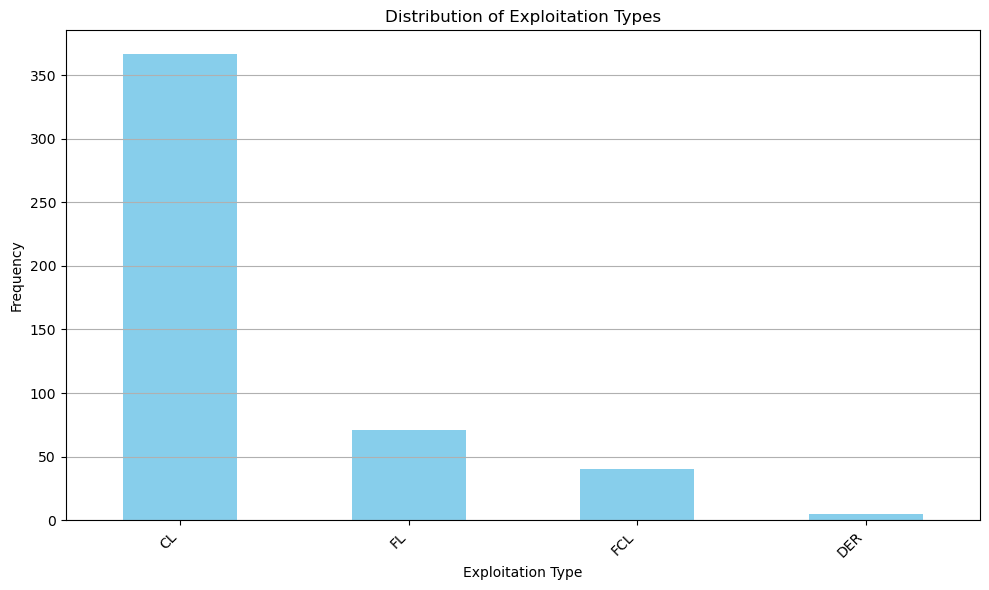

In [29]:
exploration_type_counts = df['Exploitation_Type'].value_counts()

plt.figure(figsize=(10, 6))
exploration_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Exploitation Types')
plt.xlabel('Exploitation Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Region Analysis

In [30]:
unique_sector_per_country = df.drop_duplicates(subset=['Country', 'Region'])

sector_counts = unique_sector_per_country['Region'].value_counts()

print(sector_counts)


Sub-Saharan Africa               29
Latin America & the Caribbean    17
Indo-Pacific                     12
Middle East & North Africa        4
Europe & Eurasia                  2
Name: Region, dtype: int64


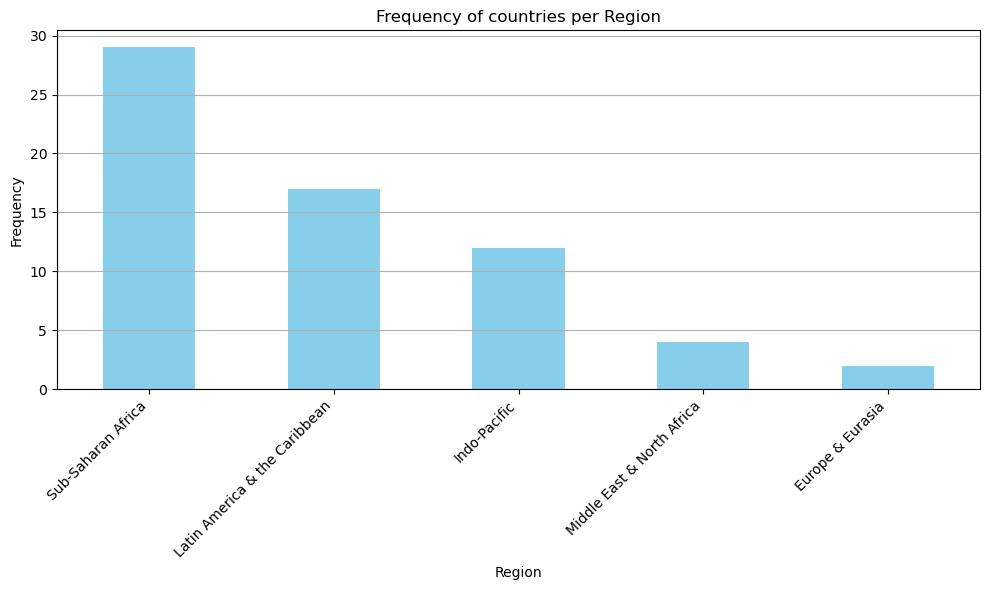

In [31]:


plt.figure(figsize=(10, 6))
sector_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of countries per Region')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y')
plt.tight_layout()
plt.show() 

In [32]:
unique_sector_per_country = df.drop_duplicates(subset=['Good', 'Region'])

sector_counts = unique_sector_per_country['Region'].value_counts()

print(sector_counts)

Latin America & the Caribbean    72
Indo-Pacific                     69
Sub-Saharan Africa               45
Middle East & North Africa        7
Europe & Eurasia                  4
Name: Region, dtype: int64


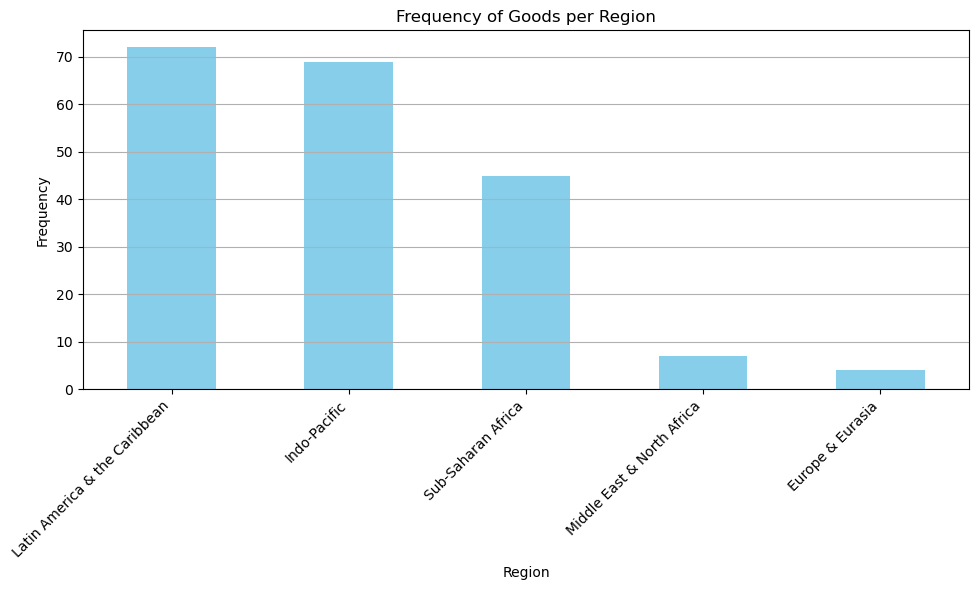

In [33]:

plt.figure(figsize=(10, 6))
sector_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Goods per Region')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y')
plt.tight_layout()
plt.show() 

In [34]:
goods_per_country = df.groupby('Country')['Good'].nunique().sort_values(ascending=False)


print(goods_per_country)

Country
India                       26
Paraguay                    25
Brazil                      25
Pakistan                    17
Mexico                      15
                            ..
Senegal                      1
Rwanda                       1
Central African Republic     1
Chad                         1
Lesotho                      1
Name: Good, Length: 64, dtype: int64


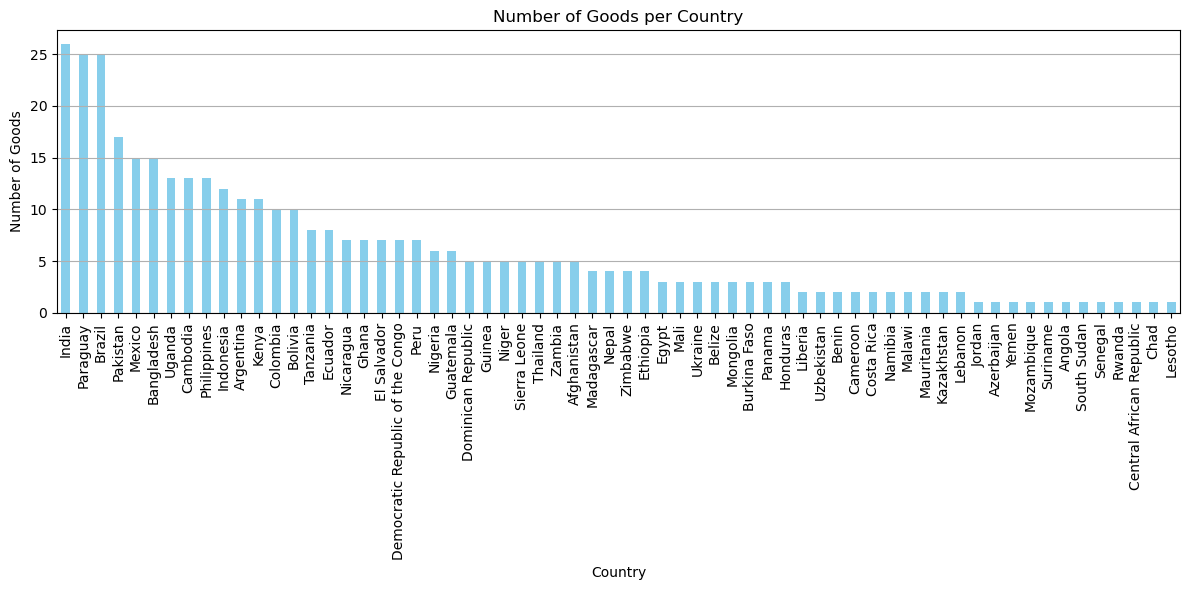

In [35]:
plt.figure(figsize=(12, 6))
goods_per_country.plot(kind='bar', color='skyblue')
plt.title('Number of Goods per Country')
plt.xlabel('Country')
plt.ylabel('Number of Goods')
plt.xticks(rotation=90)  
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Sector Analysis

In [36]:
unique_sector_per_country = df.drop_duplicates(subset=['Country', 'Sector'])

sector_counts = unique_sector_per_country['Sector'].value_counts()
print(sector_counts)

Agriculture      55
Mining           40
Manufacturing    25
Other             6
Name: Sector, dtype: int64


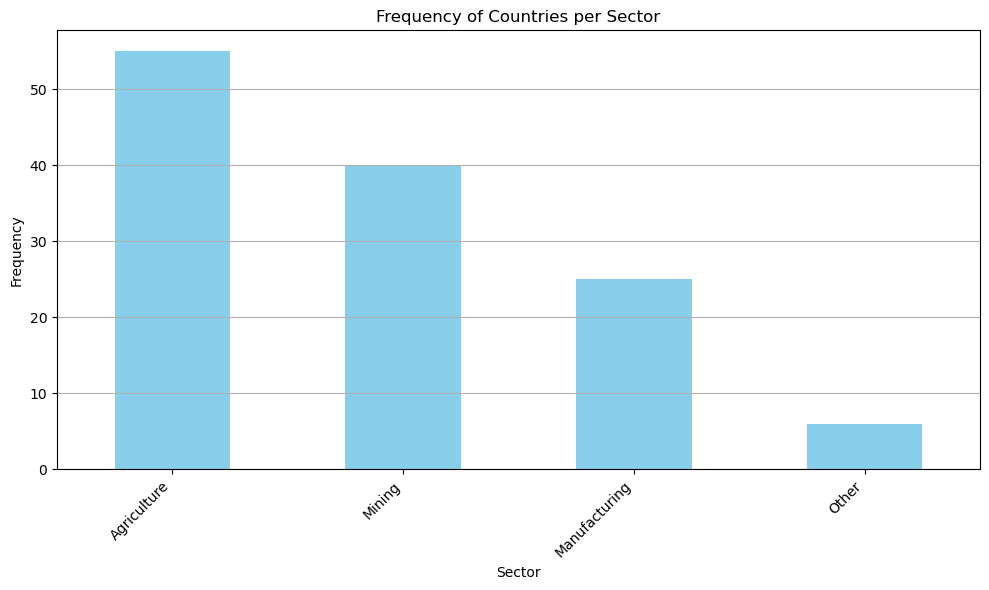

In [37]:
unique_sector_per_country = df.drop_duplicates(subset=['Country', 'Sector'])

sector_counts = unique_sector_per_country['Sector'].value_counts()

plt.figure(figsize=(10, 6))
sector_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Countries per Sector')
plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [38]:
unique_sector_per_country = df.drop_duplicates(subset=['Good', 'Sector'])

sector_counts = unique_sector_per_country['Sector'].value_counts()
print(sector_counts)

Agriculture      73
Manufacturing    37
Mining           29
Other             1
Name: Sector, dtype: int64


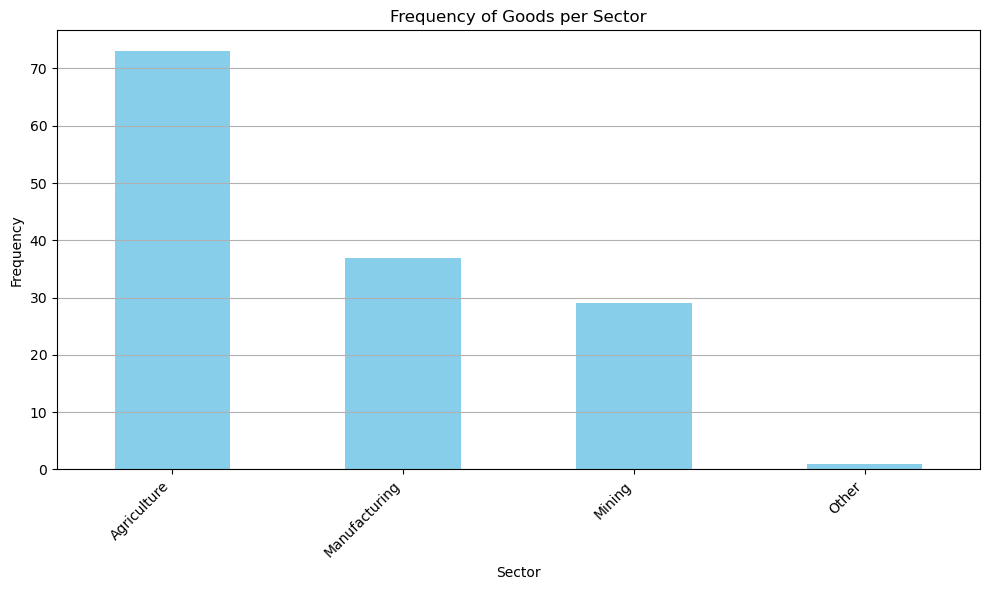

In [39]:



plt.figure(figsize=(10, 6))
sector_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Goods per Sector')
plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y')
plt.tight_layout()
plt.show() 

In [40]:
# Count the frequency of each 'Good' within 'Agriculture' sector
good_counts = df['Good'].value_counts()

# Select only the top 10 most frequent goods
top_10_goods = good_counts.head(10)
print(top_10_goods)

Gold         28
Bricks       23
Sugarcane    22
Cotton       20
Cattle       20
Tobacco      18
Coffee       16
Garments     15
Rice         14
Fish         14
Name: Good, dtype: int64


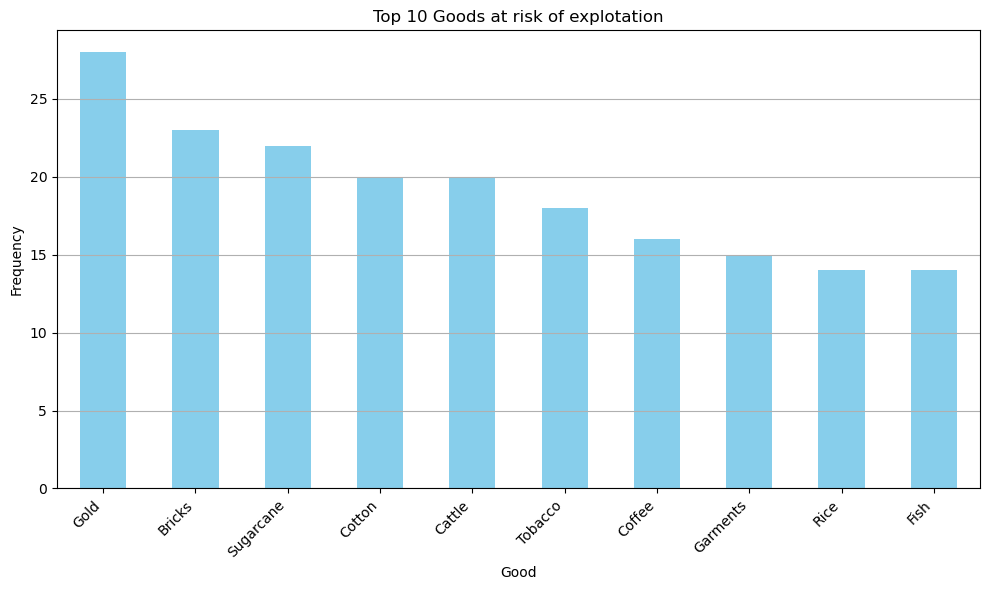

In [41]:
# Count the frequency of each 'Good' within 'Agriculture' sector
good_counts = df['Good'].value_counts()

# Select only the top 10 most frequent goods
top_10_goods = good_counts.head(10)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
top_10_goods.plot(kind='bar', color='skyblue')
plt.title('Top 10 Goods at risk of explotation')
plt.xlabel('Good')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# DataSet Part 3

Missing Values 

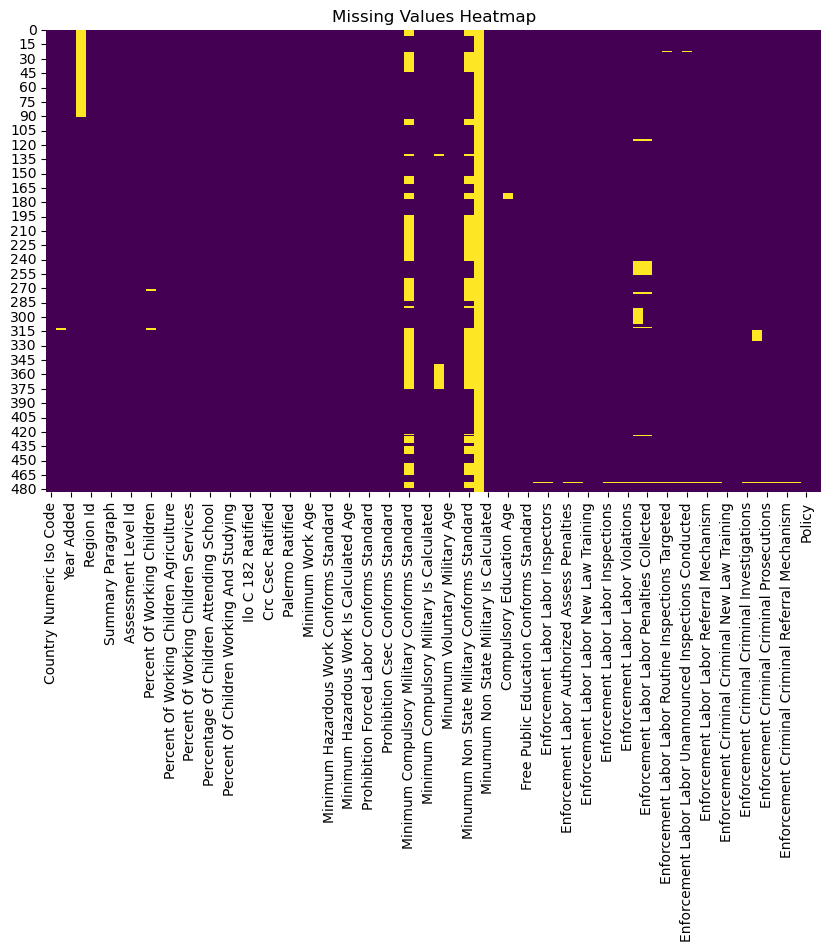

In [42]:
# Columns to exclude
exclude_cols = ['Country', 'Index_score', 'Due_Diligence_Reponse', 'Legal_framework_score', 
                'Enforcement_score', 'Outcome_score','Sector', 'Good', 'Exploitation_Type', 
                 'Region']

# Drop the columns to be excluded
df_filtered = df.drop(exclude_cols, axis=1)
# Drop the columns to be excluded
df_filtered = df.drop(exclude_cols, axis=1)

# Create heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_filtered.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [43]:
df_filtered.describe(include='all')

,Country Numeric Iso Code,Country Iso Code,Year Added,Year Removed,Region Id,Year,Summary Paragraph,Assessment_Level,Assessment Level Id,Age Range Of Working Children,...,Enforcement Criminal Criminal New Law Training,Enforcement Criminal Criminal Refresher Courses,Enforcement Criminal Criminal Investigations,Enforcement Criminal Criminal Violations,Enforcement Criminal Criminal Prosecutions,Enforcement Criminal Criminal Convictions,Enforcement Criminal Criminal Referral Mechanism,Coordination,Policy,Program
count,483.000000,481,483.000000,392.00000,483.000000,483.0,483,483,483.000000,483,...,483,483,482,470,482,482,482,482,483,483
unique,NaN,63,NaN,NaN,NaN,NaN,64,5,NaN,4,...,1,1,29,8,22,17,4,2,2,2
top,NaN,IN,NaN,NaN,NaN,NaN,"In 2022, India made moderate advancement in ef...",Moderate Advancement,NaN,5 to 14,...,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,Yes,Yes,Yes,Yes
freq,NaN,40,NaN,NaN,NaN,NaN,40,341,NaN,378,...,483,483,239,254,262,276,404,481,466,482
mean,396.091097,NaN,2011.451346,2016.34949,3.320911,2022.0,NaN,NaN,8.204969,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,248.694558,NaN,4.079502,2.47913,1.708691,0.0,NaN,NaN,14.432322,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.000000,NaN,2009.000000,2011.00000,1.000000,2022.0,NaN,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,180.000000,NaN,2009.000000,2013.00000,1.000000,2022.0,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,360.000000,NaN,2009.000000,2018.00000,4.000000,2022.0,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,586.000000,NaN,2012.000000,2018.00000,5.000000,2022.0,NaN,NaN,2.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Drop duplicate sectors that belong to the same country
unique_sector_per_country = df.drop_duplicates(subset=['Country', 'Assessment_Level'])

# Count the frequency of each sector
sector_counts2 = unique_sector_per_country['Assessment_Level'].value_counts()

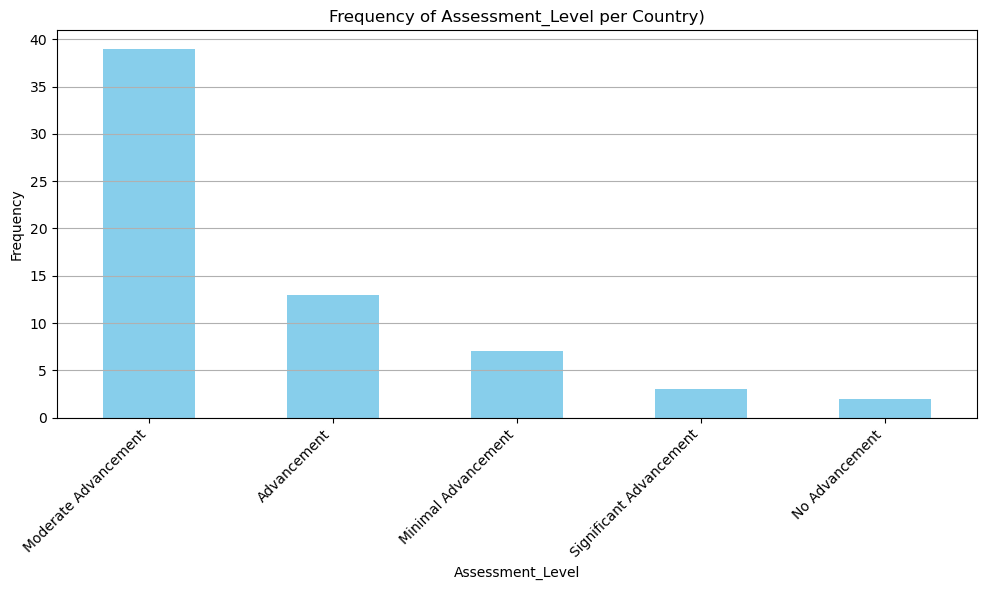

In [48]:

plt.figure(figsize=(10, 6))
sector_counts2.plot(kind='bar', color='skyblue')
plt.title('Frequency of Assessment_Level per Country)')
plt.xlabel('Assessment_Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Summary Statistics by Explotation Type

In [80]:
filtered_df_withCL = df[~df['Exploitation_Type'].isin(['FCL','FL', 'DER'])]

In [82]:
filtered_df_withCL.describe(include='all')

,Country,Index_score,Due_Diligence_Reponse,Legal_framework_score,Enforcement_score,Outcome_score,Country Numeric Iso Code,Country Iso Code,Sector,Good,...,Enforcement Criminal Criminal New Law Training,Enforcement Criminal Criminal Refresher Courses,Enforcement Criminal Criminal Investigations,Enforcement Criminal Criminal Violations,Enforcement Criminal Criminal Prosecutions,Enforcement Criminal Criminal Convictions,Enforcement Criminal Criminal Referral Mechanism,Coordination,Policy,Program
count,367,367.000000,367,367.000000,367.000000,367.000000,367.000000,365,367,367,...,367,367,366,362,366,366,366,366,367,367
unique,63,NaN,3,NaN,NaN,NaN,NaN,62,4,133,...,1,1,29,8,22,17,4,2,2,2
top,Paraguay,NaN,Enhanced,NaN,NaN,NaN,NaN,PY,Agriculture,Gold,...,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,Yes,Yes,Yes,Yes
freq,25,NaN,354,NaN,NaN,NaN,NaN,25,209,23,...,367,367,158,186,180,190,316,365,357,366
mean,NaN,5.055041,NaN,3.166049,6.167629,5.416076,397.722071,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.959975,NaN,0.904372,0.998741,1.359803,250.982026,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3.100000,NaN,1.370000,3.840000,2.290000,4.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.500000,NaN,2.410000,5.340000,4.670000,170.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,4.900000,NaN,3.100000,6.190000,5.230000,398.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,5.900000,NaN,3.860000,6.700000,6.130000,600.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
filtered_df_withFCL = df[~df['Exploitation_Type'].isin(['CL','FL', 'DER'])]

In [86]:
filtered_df_withFCL.describe(include='all')

,Country,Index_score,Due_Diligence_Reponse,Legal_framework_score,Enforcement_score,Outcome_score,Country Numeric Iso Code,Country Iso Code,Sector,Good,...,Enforcement Criminal Criminal New Law Training,Enforcement Criminal Criminal Refresher Courses,Enforcement Criminal Criminal Investigations,Enforcement Criminal Criminal Violations,Enforcement Criminal Criminal Prosecutions,Enforcement Criminal Criminal Convictions,Enforcement Criminal Criminal Referral Mechanism,Coordination,Policy,Program
count,40,40.000000,40,40.000000,40.000000,40.000000,40.000000,40,40,40,...,40,40,40,36,40,40,40,40,40,40
unique,21,NaN,2,NaN,NaN,NaN,NaN,21,3,28,...,1,1,10,4,9,8,4,1,2,1
top,India,NaN,Enhanced,NaN,NaN,NaN,NaN,IN,Agriculture,Bricks,...,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,Yes,Yes,Yes,Yes
freq,6,NaN,39,NaN,NaN,NaN,NaN,6,16,4,...,40,40,26,22,27,29,29,40,38,40
mean,NaN,5.410000,NaN,3.490750,6.547250,5.787000,408.125000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.856588,NaN,1.055929,1.203186,1.359572,249.398269,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3.700000,NaN,2.020000,3.840000,3.280000,4.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.900000,NaN,2.750000,5.870000,5.067500,180.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,5.500000,NaN,3.060000,6.430000,5.315000,356.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,6.200000,NaN,4.267500,7.360000,6.910000,571.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
filtered_df_withFL = df[~df['Exploitation_Type'].isin(['CL','FCL', 'DER'])]

In [88]:
filtered_df_withFL.describe(include='all')

,Country,Index_score,Due_Diligence_Reponse,Legal_framework_score,Enforcement_score,Outcome_score,Country Numeric Iso Code,Country Iso Code,Sector,Good,...,Enforcement Criminal Criminal New Law Training,Enforcement Criminal Criminal Refresher Courses,Enforcement Criminal Criminal Investigations,Enforcement Criminal Criminal Violations,Enforcement Criminal Criminal Prosecutions,Enforcement Criminal Criminal Convictions,Enforcement Criminal Criminal Referral Mechanism,Coordination,Policy,Program
count,71,71.000000,71,71.000000,71.000000,71.000000,71.000000,71,71,71,...,71,71,71,67,71,71,71,71,71,71
unique,31,NaN,2,NaN,NaN,NaN,NaN,31,3,39,...,1,1,12,6,13,10,4,1,2,1
top,India,NaN,Enhanced,NaN,NaN,NaN,NaN,IN,Agriculture,Garments,...,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,Yes,Yes,Yes,Yes
freq,9,NaN,69,NaN,NaN,NaN,NaN,9,39,6,...,71,71,50,41,50,52,54,71,66,71
mean,NaN,5.161972,NaN,3.366901,6.302535,5.472676,383.422535,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.971356,NaN,1.036018,1.109755,1.414250,248.011789,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3.600000,NaN,1.590000,3.840000,2.860000,4.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.500000,NaN,2.750000,5.340000,4.600000,175.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,5.000000,NaN,3.060000,6.330000,5.270000,356.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,6.000000,NaN,3.850000,7.135000,6.890000,586.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
filtered_df_withDER = df[~df['Exploitation_Type'].isin(['CL','FCL', 'FL'])]

In [90]:
filtered_df_withDER.describe(include='all')

,Country,Index_score,Due_Diligence_Reponse,Legal_framework_score,Enforcement_score,Outcome_score,Country Numeric Iso Code,Country Iso Code,Sector,Good,...,Enforcement Criminal Criminal New Law Training,Enforcement Criminal Criminal Refresher Courses,Enforcement Criminal Criminal Investigations,Enforcement Criminal Criminal Violations,Enforcement Criminal Criminal Prosecutions,Enforcement Criminal Criminal Convictions,Enforcement Criminal Criminal Referral Mechanism,Coordination,Policy,Program
count,5,5.0,5,5.000000e+00,5.00,5.00,5.0,5,5,5,...,5,5,5,5,5,5,5,5,5,5
unique,1,NaN,1,NaN,NaN,NaN,NaN,1,2,5,...,1,1,1,1,1,1,1,1,1,1
top,Indonesia,NaN,Enhanced,NaN,NaN,NaN,NaN,ID,Agriculture,Crude Palm Oil,...,Unknown,Yes,Unknown,Unknown,Unknown,Unknown,Yes,Yes,Yes,Yes
freq,5,NaN,5,NaN,NaN,NaN,NaN,5,4,1,...,5,5,5,5,5,5,5,5,5,5
mean,NaN,4.9,NaN,3.270000e+00,5.95,5.27,360.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.0,NaN,4.965068e-16,0.00,0.00,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,4.9,NaN,3.270000e+00,5.95,5.27,360.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,4.9,NaN,3.270000e+00,5.95,5.27,360.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,4.9,NaN,3.270000e+00,5.95,5.27,360.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.9,NaN,3.270000e+00,5.95,5.27,360.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
